<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D(%EC%9B%90%EB%8D%B0%EC%9D%B4_%ED%81%B4%EB%A0%88%EC%8A%A4_23_10_18_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [53]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36"}

In [55]:
response = requests.get("https://news.naver.com/main/ranking/popularMemo.naver", headers=headers)
html=response.text
soup=BeautifulSoup(html,'html.parser')
word=soup.select_one(".rankingnews_tit")

In [56]:
word.text

'언론사별 랭킹뉴스'

In [57]:
newslist = soup.select(".rankingnews_list")

In [58]:
len(newslist)

80

In [ ]:
newslist

In [61]:
newsData = []

for news in newslist[:12]:  #12개의 언론사
  lis = news.find_all("li") #상위랭킹 5개의 뉴스데이터 수집
  for li in lis:
    news_ranking = li.select_one(".list_ranking_num").text     #랭킹
    news_title = li.select_one(".list_title").text             #제목
    news_link = li.select_one(".list_title").get("href")       #링크
    try:                                                       #썸네일
      news_img = li.select_one("img").get("src")
    except:
      news_img = None


    response = requests.get(news_link, headers=headers)       #뉴스본문링크 주소로 get요청
    html=response.text
    soup = BeautifulSoup(html,'html.parser')

    news_time = soup.select_one(".media_end_head_info_datestamp_time._ARTICLE_DATE_TIME").get("data-date-time")
    news_content = soup.select_one("#newsct_article")
    news_content = news_content.text.replace("\n", "").replace("\t", "") if news_content else None           #문자열에서 줄바꿈(\n) 문자열 제거,  탭(\t)문자를 공백 제거

    newsData.append([news_ranking, news_title, news_link, news_img, news_time, news_content])    #내용저장

In [60]:
newsData

[['1',
  '서울대 치대도 포기...무조건 의대로',
  'https://n.news.naver.com/article/052/0001948558?ntype=RANKING',
  'https://mimgnews.pstatic.net/image/origin/052/2023/10/18/1948558.jpg?type=nf70_70',
  '2023-10-18 15:02:12',
  "[앵커]의대 쏠림이 심해지면서 서울대조차 중도 포기자가 늘고 있습니다.이공계는 물론 같은 의약계열 내에서조차 의대를 좇는 현상이 심해지고 있는데 의사 증원과 더불어 인재 양성 전반에 대한 대책이 함께 제시돼야 한다는 지적입니다.김현아 기자가 보도합니다.[기자]어떤 대학이든, 몇 수를 하든, 무조건 의대로!최상위권 학생 사이에 퍼진 광풍에 가까운 '의대 블랙홀' 현상은 서울대도 피하지 못했습니다.서울대에선 최근 4년간 매년 10% 정도가 학교를 자퇴했는데 2019년 193명에서 2022년 328명으로 70% 가까이 증가했습니다.더욱이 이 기간, 의치대 자퇴생은 없는데 반해 공대는 328명, 농업생명과학대 277명, 자연과학대는 152명이나 학교를 그만 뒀습니다.이들 대부분이 N수로 의대에 진학했을 것으로 추정됩니다.[김원중 / 대성학원 입시전략실장 : 거의 압도적으로 의대를 가려고 하죠. (지방이라도? 서울의 좋은 대학교 돼도?) '지방이라도'가 아니라, 어디든 가죠. 대부분의 학생들 입장에서는 (의대와 다른 과들은) 비교 대상이 아니에요.][이만기 / 유웨이교육 평가연구소장 : (의대는) 수입이 되고 정년이 없는 것이 가장 강점인데, 이공계 학과에 가면 그걸 보장을 못 하잖아요.]의대 쏠림 현상은 심지어 같은 의약계열 내에서도 심각한 수준입니다.서울대에 합격하고도 다른 대학에 간 학생 비율을 보면, 1위부터 4위까지가 모두 의약계열인데, 서울대 치대조차 평균 3명 가운데 1명 넘게 등록을 포기했습니다.치과의사와 달리 일반 의사는 진료과목에 제한 없이 소위 '돈 되는 과'는 모두 개설

In [62]:
df = pd.DataFrame(newsData, columns=["ranking", "title", "link", "img", "time", "contents"])


In [68]:
df.to_excel('/content/drive/MyDrive/2023년 2학기 데이터 강의 뉴스데이터 심화/이거다.xlsx')

In [ ]:
#01 코랩에서 한글 사용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and direc

In [ ]:
#코랩 matplotlib 한글 사용용
!pip install koreanize-matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud #워드클라우드 그리기
from konlpy.tag import Okt  #한글 형태소 분석
from collections import Counter  #단어 빈도수
import pandas as pd    #pandas
import matplotlib.pyplot as plt

In [70]:
text=df['contents'] # contents 내용 추출하여 text에 저장

In [71]:
text

0     [앵커]의대 쏠림이 심해지면서 서울대조차 중도 포기자가 늘고 있습니다.이공계는 물론...
1     [앵커]정부의 의대 증원 방침에 대해 의사협회는 예상대로 총파업을 거론하며 강경하게...
2     [앵커]윤석열 대통령이 헌법재판소장 후보자로 이종석 헌법재판관을 지명했습니다.다음 ...
3     [앵커]윤석열 대통령은 '경찰의 날' 기념식에 참석해 국민 안전을 지키는 것은 국가...
4     10·29 이태원 참사가 발생한 지 1년이 다 되어갑니다.핼러윈을 앞두고 떠들썩하던...
5     팔레스타인 무장 정파 하마스와 이스라엘의 전쟁이 격화하는 가운데 가자 지구의 병원이...
6     GS샵은 오는 19일 'TS샴푸' 특징 방송을 실시하고, 모든 구매 고객에게 '20...
7     소득 하위 70% 고령층에 지급되는 기초연금 수급 대상을 줄이되, 수급액은 지금보다...
8     사진: 존 허스먼지난 2000년 닷컴버블과 2008년 글로벌 금융위기를 정확히 예측...
9     가수 이찬원이 소주 모델자리를 꿰찼다.금복주는 리뉴얼한 참소주 광고모델로 가수 이찬...
10    [국무회의 참석한 한덕수 국무총리 (사진=연합뉴스)]한덕수 국무총리가 오늘(18일)...
11    [티켓베이 임영웅 콘서트 암표 현황 (사진=류호정 의원실)]"임영웅 콘서트 암표가 ...
12    [앵커]노사 갈등과는 좀 다릅니다만, 인력을 놓고 갈등 속에 빠진 집단이 또 있죠....
13    보건복지부 장관이 자문위원회가 기초연금 수급자 수를 줄이되 받는 액수는 10만원 증...
14    [통계물리학자 김범준 성균관대 교수. (사진='지식인사이드' 유튜브 갈무리)]최근 ...
15    윤석열 대통령이 18일 청와대 영빈관에서 열린 제78주년 경찰의날 기념식에서 축사하...
16    ‘홍보맨’ 김선태 주무관, 여대생 인터뷰 영상 공개“연락처 달라는 男, 갤럭시라서 ...
17    대전보호관찰소 A씨 신상 공개·제보 요청전자발찌 훼손하고 도주한 성범죄자 A

In [72]:
change=list(map(str, text))

In [77]:
change

["[앵커]의대 쏠림이 심해지면서 서울대조차 중도 포기자가 늘고 있습니다.이공계는 물론 같은 의약계열 내에서조차 의대를 좇는 현상이 심해지고 있는데 의사 증원과 더불어 인재 양성 전반에 대한 대책이 함께 제시돼야 한다는 지적입니다.김현아 기자가 보도합니다.[기자]어떤 대학이든, 몇 수를 하든, 무조건 의대로!최상위권 학생 사이에 퍼진 광풍에 가까운 '의대 블랙홀' 현상은 서울대도 피하지 못했습니다.서울대에선 최근 4년간 매년 10% 정도가 학교를 자퇴했는데 2019년 193명에서 2022년 328명으로 70% 가까이 증가했습니다.더욱이 이 기간, 의치대 자퇴생은 없는데 반해 공대는 328명, 농업생명과학대 277명, 자연과학대는 152명이나 학교를 그만 뒀습니다.이들 대부분이 N수로 의대에 진학했을 것으로 추정됩니다.[김원중 / 대성학원 입시전략실장 : 거의 압도적으로 의대를 가려고 하죠. (지방이라도? 서울의 좋은 대학교 돼도?) '지방이라도'가 아니라, 어디든 가죠. 대부분의 학생들 입장에서는 (의대와 다른 과들은) 비교 대상이 아니에요.][이만기 / 유웨이교육 평가연구소장 : (의대는) 수입이 되고 정년이 없는 것이 가장 강점인데, 이공계 학과에 가면 그걸 보장을 못 하잖아요.]의대 쏠림 현상은 심지어 같은 의약계열 내에서도 심각한 수준입니다.서울대에 합격하고도 다른 대학에 간 학생 비율을 보면, 1위부터 4위까지가 모두 의약계열인데, 서울대 치대조차 평균 3명 가운데 1명 넘게 등록을 포기했습니다.치과의사와 달리 일반 의사는 진료과목에 제한 없이 소위 '돈 되는 과'는 모두 개설할 수 있어서란 분석인데,정부가 의사 증원과 함께 인력 양성 대책을 함께 내놔야 한다는 지적이 나옵니다.[서동용 / 민주당 의원 : 의대로만 쏠리는 현상을 계속 방치하면 학문도 문제겠고, 산업과 경제까지 위기가 초래될 수밖에 없지 않을까 하는 생각입니다. 국가 성장 동력을 확보할 수 있는 균형 있는 인재 양성 정책 수립을 서둘러야 한다고 생각합니다.]더불어, 의대 증원 역시 목표

In [73]:
text2=','.join(change)

In [76]:
text2

'[앵커]의대 쏠림이 심해지면서 서울대조차 중도 포기자가 늘고 있습니다.이공계는 물론 같은 의약계열 내에서조차 의대를 좇는 현상이 심해지고 있는데 의사 증원과 더불어 인재 양성 전반에 대한 대책이 함께 제시돼야 한다는 지적입니다.김현아 기자가 보도합니다.[기자]어떤 대학이든, 몇 수를 하든, 무조건 의대로!최상위권 학생 사이에 퍼진 광풍에 가까운 \'의대 블랙홀\' 현상은 서울대도 피하지 못했습니다.서울대에선 최근 4년간 매년 10% 정도가 학교를 자퇴했는데 2019년 193명에서 2022년 328명으로 70% 가까이 증가했습니다.더욱이 이 기간, 의치대 자퇴생은 없는데 반해 공대는 328명, 농업생명과학대 277명, 자연과학대는 152명이나 학교를 그만 뒀습니다.이들 대부분이 N수로 의대에 진학했을 것으로 추정됩니다.[김원중 / 대성학원 입시전략실장 : 거의 압도적으로 의대를 가려고 하죠. (지방이라도? 서울의 좋은 대학교 돼도?) \'지방이라도\'가 아니라, 어디든 가죠. 대부분의 학생들 입장에서는 (의대와 다른 과들은) 비교 대상이 아니에요.][이만기 / 유웨이교육 평가연구소장 : (의대는) 수입이 되고 정년이 없는 것이 가장 강점인데, 이공계 학과에 가면 그걸 보장을 못 하잖아요.]의대 쏠림 현상은 심지어 같은 의약계열 내에서도 심각한 수준입니다.서울대에 합격하고도 다른 대학에 간 학생 비율을 보면, 1위부터 4위까지가 모두 의약계열인데, 서울대 치대조차 평균 3명 가운데 1명 넘게 등록을 포기했습니다.치과의사와 달리 일반 의사는 진료과목에 제한 없이 소위 \'돈 되는 과\'는 모두 개설할 수 있어서란 분석인데,정부가 의사 증원과 함께 인력 양성 대책을 함께 내놔야 한다는 지적이 나옵니다.[서동용 / 민주당 의원 : 의대로만 쏠리는 현상을 계속 방치하면 학문도 문제겠고, 산업과 경제까지 위기가 초래될 수밖에 없지 않을까 하는 생각입니다. 국가 성장 동력을 확보할 수 있는 균형 있는 인재 양성 정책 수립을 서둘러야 한다고 생각합니다.]더불어, 의대 증원 

In [78]:
okt=Okt()
extract=okt.nouns(text2)

In [79]:
extract

['앵커',
 '의대',
 '서울대',
 '중도',
 '포기',
 '늘',
 '이공',
 '의약',
 '계열',
 '내',
 '의대',
 '좇는',
 '현상',
 '의사',
 '증원',
 '인재',
 '양성',
 '전반',
 '대한',
 '대책',
 '제시',
 '지적',
 '김현아',
 '기자',
 '보도',
 '기자',
 '대학',
 '몇',
 '수',
 '하든',
 '무조건',
 '의대',
 '최',
 '상위',
 '학생',
 '사이',
 '광풍',
 '의대',
 '블랙홀',
 '현상',
 '서울대',
 '피하',
 '서울대',
 '최근',
 '매년',
 '정도',
 '학교',
 '자퇴',
 '명',
 '명',
 '가까이',
 '증가',
 '더욱이',
 '이',
 '기간',
 '의치',
 '자퇴생',
 '공대',
 '명',
 '농업',
 '생명과학',
 '명',
 '자연과학',
 '명',
 '학교',
 '이',
 '대부분',
 '수로',
 '의대',
 '진학',
 '것',
 '추정',
 '김원중',
 '대성',
 '학원',
 '입시',
 '전략',
 '실장',
 '거의',
 '압도',
 '의대',
 '지방',
 '서울',
 '대학교',
 '지방',
 '어디',
 '대부분',
 '학생',
 '입장',
 '의대',
 '다른',
 '과',
 '비교',
 '대상',
 '이만기',
 '유',
 '웨이',
 '교육',
 '평가',
 '연구소장',
 '의대',
 '수입',
 '정년',
 '것',
 '가장',
 '강점',
 '이공',
 '학과',
 '가면',
 '보장',
 '못',
 '의대',
 '현상',
 '심지어',
 '의약',
 '계열',
 '내',
 '수준',
 '서울대',
 '합격',
 '다른',
 '대학',
 '간',
 '학생',
 '비율',
 '위',
 '위',
 '모두',
 '의약',
 '계열',
 '서울대',
 '평균',
 '명',
 '가운데',
 '명',
 '등록',
 '포기',
 '치과의사',
 '달리',
 '일반',
 '의사',
 '진료',
 '과

In [80]:
# 명사 리스트에서 1글자 넘는 단어만 고르기
noun_list = []
for n in extract:
   if (len(n) >1):
     noun_list.append(n)

In [81]:
noun_list

['앵커',
 '의대',
 '서울대',
 '중도',
 '포기',
 '이공',
 '의약',
 '계열',
 '의대',
 '좇는',
 '현상',
 '의사',
 '증원',
 '인재',
 '양성',
 '전반',
 '대한',
 '대책',
 '제시',
 '지적',
 '김현아',
 '기자',
 '보도',
 '기자',
 '대학',
 '하든',
 '무조건',
 '의대',
 '상위',
 '학생',
 '사이',
 '광풍',
 '의대',
 '블랙홀',
 '현상',
 '서울대',
 '피하',
 '서울대',
 '최근',
 '매년',
 '정도',
 '학교',
 '자퇴',
 '가까이',
 '증가',
 '더욱이',
 '기간',
 '의치',
 '자퇴생',
 '공대',
 '농업',
 '생명과학',
 '자연과학',
 '학교',
 '대부분',
 '수로',
 '의대',
 '진학',
 '추정',
 '김원중',
 '대성',
 '학원',
 '입시',
 '전략',
 '실장',
 '거의',
 '압도',
 '의대',
 '지방',
 '서울',
 '대학교',
 '지방',
 '어디',
 '대부분',
 '학생',
 '입장',
 '의대',
 '다른',
 '비교',
 '대상',
 '이만기',
 '웨이',
 '교육',
 '평가',
 '연구소장',
 '의대',
 '수입',
 '정년',
 '가장',
 '강점',
 '이공',
 '학과',
 '가면',
 '보장',
 '의대',
 '현상',
 '심지어',
 '의약',
 '계열',
 '수준',
 '서울대',
 '합격',
 '다른',
 '대학',
 '학생',
 '비율',
 '모두',
 '의약',
 '계열',
 '서울대',
 '평균',
 '가운데',
 '등록',
 '포기',
 '치과의사',
 '달리',
 '일반',
 '의사',
 '진료',
 '과목',
 '제한',
 '소위',
 '모두',
 '개설',
 '분석',
 '정부',
 '의사',
 '증원',
 '인력',
 '양성',
 '대책',
 '지적',
 '서동',
 '민주당',
 '의원',
 '의대',
 '로만',
 '현상',
 '계속',


In [82]:
counts=Counter(noun_list)

In [83]:
tags=counts.most_common(100)  #빈도순으로 정리하기

In [84]:
tags

[('국민', 111),
 ('대통령', 99),
 ('대표', 85),
 ('정부', 80),
 ('의대', 62),
 ('병원', 53),
 ('사람', 50),
 ('생각', 47),
 ('지난', 46),
 ('의원', 45),
 ('이스라엘', 45),
 ('대통령실', 43),
 ('예찬', 39),
 ('정책', 38),
 ('민주당', 37),
 ('대해', 37),
 ('오늘', 37),
 ('위해', 37),
 ('대한', 36),
 ('지역', 36),
 ('우리', 36),
 ('지금', 35),
 ('국회', 35),
 ('정치', 35),
 ('지방', 33),
 ('의료', 33),
 ('정원', 33),
 ('윤석열', 33),
 ('라며', 33),
 ('최고', 33),
 ('소득', 32),
 ('위원회', 31),
 ('팔레스타인', 31),
 ('연합뉴스', 31),
 ('갤럭시', 31),
 ('은행', 31),
 ('서울', 28),
 ('관련', 28),
 ('가자지구', 28),
 ('대구', 28),
 ('이번', 27),
 ('사진', 27),
 ('기준', 26),
 ('이상', 26),
 ('방송', 25),
 ('신고', 25),
 ('한국', 25),
 ('일본', 25),
 ('모습', 24),
 ('부장', 24),
 ('경찰', 24),
 ('강조', 24),
 ('공습', 24),
 ('이스라엘군', 24),
 ('사실', 24),
 ('아이폰', 24),
 ('위원', 24),
 ('최근', 23),
 ('확대', 23),
 ('김기현', 23),
 ('도부', 23),
 ('보수', 23),
 ('헌신', 23),
 ('노은지', 23),
 ('후보자', 22),
 ('때문', 22),
 ('영상', 22),
 ('수도권', 22),
 ('검사', 22),
 ('지적', 21),
 ('비판', 21),
 ('수급', 21),
 ('장관', 21),
 ('여당', 21),
 ('청년', 21),


In [85]:
#리스트를 데이터프레임으로 변환하기
df=pd.DataFrame(tags, columns=['단어', '빈도'])
#원자료에서 상위 10개 행만 추출하기
df2=df.loc[0:9]

In [86]:
df2

,단어,빈도
0,국민,111
1,대통령,99
2,대표,85
3,정부,80
4,의대,62
5,병원,53
6,사람,50
7,생각,47
8,지난,46
9,의원,45


<Axes: xlabel='단어'>

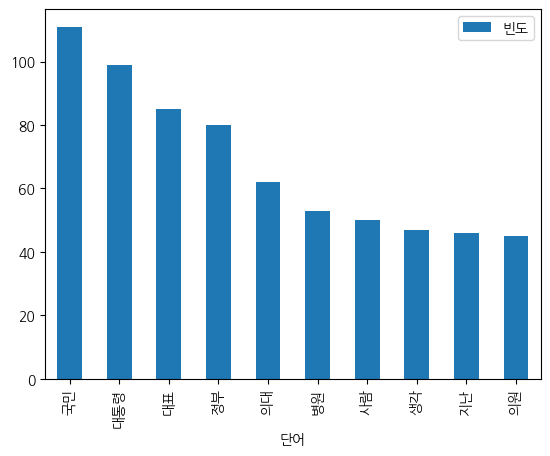

In [87]:
df2.plot.bar(x='단어',y='빈도')

In [88]:
import plotly.express as px
fig=px.bar(df2, x='빈도', y='단어', orientation='h')
fig.show()

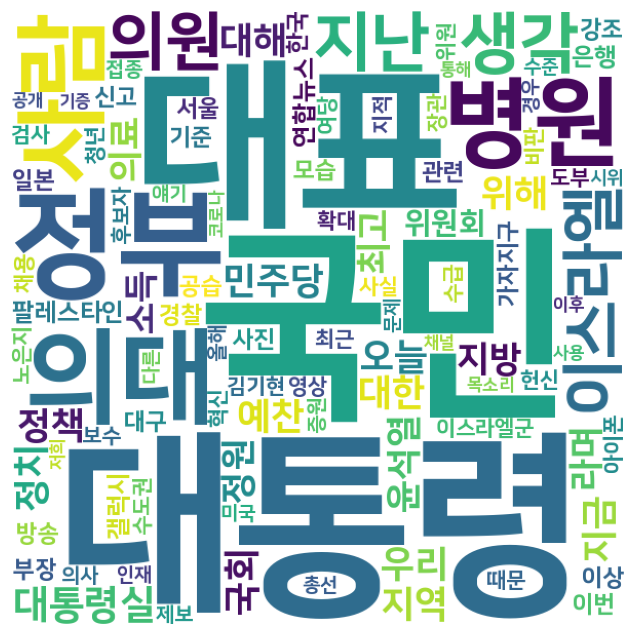

In [94]:
#워드 클라우드 생성하기
wc = WordCloud(font_path='/content/drive/MyDrive/2023년 2학기 데이터 강의 뉴스데이터 심화/NanumSquareEB__1_.ttf____',
               background_color="white",
               max_font_size=200, #가장 큰 글자 사이즈
               width = 600,  #그림가로길이
               height =600)  #그림 세로길이
cloud = wc.generate_from_frequencies(dict(tags))

#워드 클라우드 그리기
plt.figure(figsize=(8, 8)) #그림 사이즈
plt.axis('off') #x,y 축지정
plt.imshow(cloud)
plt.show()

In [96]:
from PIL import Image
import numpy as np
# 마스크 이미지를 url에서 불러오기
img = Image.open('/content/drive/MyDrive/2023년 2학기 데이터 강의 뉴스데이터 심화/star.jpg____')    # 마스크가 될 이미지 불러오기
imgArray=np.array(img) #이미지 셀을 수치로 변환

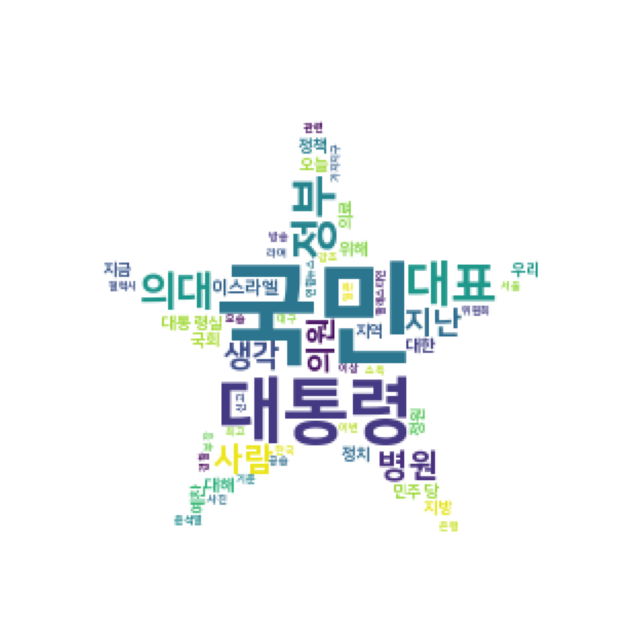

In [97]:
wc2 = WordCloud(font_path='/content/drive/MyDrive/2023년 2학기 데이터 강의 뉴스데이터 심화/NanumSquareEB__1_.ttf____',
               background_color="white",
               max_font_size=200, #가장 큰 글자 사이즈
               width = 600,  #그림가로길이
               height =600,  #그림 세로길이
               mask=imgArray)

cloud2 = wc2.generate_from_frequencies(dict(tags))

#워드 클라우드 그리기
plt.figure(figsize=(8, 8)) #그림 사이즈
plt.axis('off') #x,y 축지정
plt.imshow(cloud2)
plt.show()